In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
import json, multiprocessing

In [43]:
corpus = json.load(open('doc_tokens','r'))
corpus = [
    TaggedDocument(words, ['d{}'.format(idx)])
    for idx, words in enumerate(corpus)
]

In [3]:
cores = multiprocessing.cpu_count()
cores

4

In [71]:
model = Doc2Vec(corpus, vector_size=100, min_count=10, workers=cores)
#Persist a model to disk:
 
fname = 'medline_model_doc2vec'
model.save(fname)

medline_model_doc2vec


In [28]:
model = Doc2Vec.load(fname)  
# you can continue training with the loaded model!
#If you’re finished training a model (=no more updates, only querying, reduce memory usage), you can do:

model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model.docvecs[0]

array([-0.04606867,  0.0190621 ,  0.0027372 , ...,  0.01187525,
        0.04856149, -0.00193232], dtype=float32)

In [9]:
print len(corpus)

1033


In [65]:
doc2vec_vectors = []
for i in range(len(corpus)):
    doc2vec_vectors.append(model.docvecs[i].tolist())
    
json.dump(doc2vec_vectors, open('doc2vec_vectors','w'))

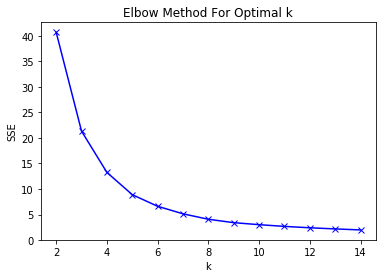

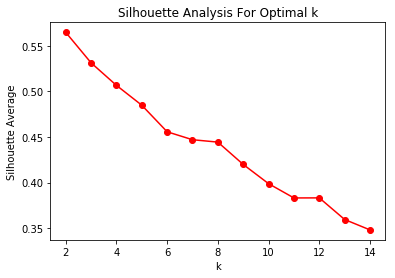

In [72]:
doc2vec_vectors = json.load(open('doc2vec_vectors','r'))

sse = []
silhouette_avg = []

k_values = range(2,15)
for k in k_values:
    km = KMeans(n_clusters=k)
    km_sse = km.fit(doc2vec_vectors)
    sse.append(km_sse.inertia_)
    km_sil = km_sse.predict(doc2vec_vectors)
    
    silhouette_avg.append(silhouette_score(doc2vec_vectors, km_sil))

plt.plot(k_values, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(k_values, silhouette_avg, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

In [76]:
k = 4

km = KMeans(n_clusters=k)
labels = km.fit_predict(doc2vec_vectors).tolist()
json.dump(labels, open('cluster_labels','w'))